In [ ]:

import os
from google.colab import drive

import numpy as np
from numpy import expand_dims

from matplotlib import pyplot

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, Flatten



In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#For fire and no fire training files
#0.8 for training and 0.2 for validation 

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "/content/gdrive/MyDrive/Colab_Notebooks/CEProje/Pre-Render/Train", validation_split=0.2, subset="training", seed=1337, image_size=(200,200),batch_size=20, shuffle=True)

Found 40723 files belonging to 2 classes.
Using 32579 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        "/content/gdrive/MyDrive/Colab_Notebooks/CEProje/Pre-Render/Train", validation_split=0.2, subset="validation", seed=1337, image_size=(200,200),
        batch_size=20, shuffle=True)

Found 40723 files belonging to 2 classes.
Using 8144 files for validation.


In [ ]:
#Pre fetch was used for sequential model. 
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [ ]:
#Difference from VGG16 model usage, sequential model was used
from keras import layers
from keras import models


#Creates the model with convonutional layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)      

In [ ]:
#Optimizers
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
#Trains the model
history = model.fit(train_ds,steps_per_epoch=10,
                              epochs = 15,
                              validation_data=val_ds,
                              batch_size=32,verbose=1)

Epoch 1/15
10/10 [==============================] - 2801s 304s/step - loss: 41.2890 - acc: 0.4367 - val_loss: 1.7287 - val_acc: 0.3830
Epoch 2/15
10/10 [==============================] - 179s 20s/step - loss: 2.1022 - acc: 0.5520 - val_loss: 1.1443 - val_acc: 0.3948
Epoch 3/15
10/10 [==============================] - 178s 20s/step - loss: 1.3517 - acc: 0.5584 - val_loss: 1.8440 - val_acc: 0.6170
Epoch 4/15
10/10 [==============================] - 181s 20s/step - loss: 0.9112 - acc: 0.6934 - val_loss: 1.7715 - val_acc: 0.6170
Epoch 5/15
10/10 [==============================] - 178s 20s/step - loss: 1.2711 - acc: 0.5675 - val_loss: 0.4963 - val_acc: 0.7345
Epoch 6/15
10/10 [==============================] - 178s 20s/step - loss: 0.7084 - acc: 0.6285 - val_loss: 0.4902 - val_acc: 0.8010
Epoch 7/15
10/10 [==============================] - 179s 20s/step - loss: 1.1491 - acc: 0.5447 - val_loss: 0.5309 - val_acc: 0.8123
Epoch 8/15
10/10 [==============================] - 178s 20s/step - loss:

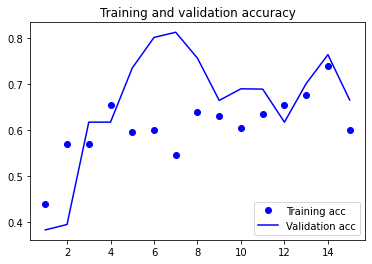

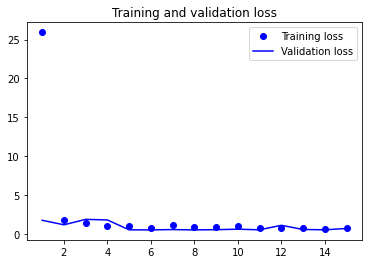

In [ ]:
model.save('fireModel_Old.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_fire_ds = tf.keras.preprocessing.image_dataset_from_directory(
        "/content/gdrive/MyDrive/Colab_Notebooks/CEProje/Pre-Render/Test", seed=1337, image_size=(200,200), batch_size=32, shuffle=True)

Found 8619 files belonging to 2 classes.


In [ ]:
loss, accuracy = model.evaluate(test_fire_ds)
print("Accuracy", accuracy)

270/270 [==============================] - 3522s 13s/step - loss: 1.0175 - acc: 0.5961
Accuracy 0.5961248278617859
